<h1><center>Лекція 1.</center></h1>
<h2><center>Первинний аналіз даних з Pandas</center></h2>

**[Pandas](http://pandas.pydata.org)** — це бібліотека мови програмування Python, що надає широкі можливості для аналізу даних й зазвичай використовується до інтелектуального аналізу даних (ІАД). `Pandas` дає змогу зручно завантажувати, обробляти й аналізувати табличні дані за SQL-подібними запитами. Поєднання `Pandas` разом із бібліотеками `Matplotlib` і `Seaborn` дає нагоду виконувати професійний візуальний аналіз табличних даних.

<a class="anchor" id="1"></a>

## Зміст 

1. [Демонстрація основних методів Pandas](#1.1)
    - [Читання з файлу і первинний аналіз](#1.1.1)
    - [Сортування](#1.1.2)
    - [Індексування та вилучення даних](#1.1.3)
    - [Використання спеціалізованих функцій](#1.1.4)
    - [Групування даних](#1.1.5)
    - [Зведені таблиці](#1.1.6)
    - [Перетворення датафреймів](#1.1.7)
2. [Перші спроби прогнозування відтоку](#1.2)
3. [Корисні покликання](#1.3)

Спершу завантажимо потрібні нам бібліотеки:

In [1]:
import numpy as np
import pandas as pd

Дані, з якими працюють аналітики та інженери, зазвичай зберігаються у вигляді таблиць — наприклад, в форматах `.csv`, `.tsv` або `.xlsx`. Для того, щоб вилучати потрібні дані з таких файлів, відмінно підходить бібліотека Pandas.

Основними структурами даних в Pandas є класи `Series` і `DataFrame`. Перший — це одномірний індексований масив даних деякого фіксованого типу. Другий — це двомірна структура даних, що подана як таблиця, кожен стовпець якої містить дані одного типу. Можна представляти її, як словник об'єктів типу `Series`. Структура `DataFrame` відмінно підходить для подання реальних даних: рядки відповідають описам ознак окремих об'єктів, а стовпці — ознакам.

---------

<a class="anchor" id="1.1"></a>

## <span style="color:blue; font-size:1.2em;">1.1. Демонстрація основних методів Pandas</span>

[Повернутися до змісту](#1)

<a class="anchor" id="1.1.1"></a>

### <span style="color:blue; font-size:1em;">1.1.1. Читання з файлу і первинний аналіз</span>

[Повернутися до змісту](#1)

Прочитаємо дані й переглянемо перші 5 рядків за допомогою методу `head`:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/01_lecture-notes/ida_lecture-01_pandas_data_analysis/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


У Jupyter-ноутбуках датафрейми `Pandas` виводяться у вигляді ось таких гарних табличок, і `print(df.head())` виглядає гірше.

До речі, за замовчуванням `Pandas` виводить всього 20 стовпців і 60 рядків, тому якщо ваш датафрейм більше, скористайтеся функцією` set_option`:

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Також задамо значення параметра `presicion` рівним 2, щоб відображати два знака після коми (а не 6, як встановлено за замовчуванням).

In [5]:
pd.set_option('precision', 2)

Подивимося на розмір даних, назви ознак та їх типи.

In [6]:
print(df.shape)

(3333, 20)


Бачимо, що в таблиці є 3333 рядки й 20 стовпців. Виведемо назви стовпців:

In [7]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Щоб подивитися загальну інформацію щодо датафрейму і всіма ознаками, скористаємося методом **`info`**:

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

`bool`, `int64`, `float64` та `object` — це типи ознак. Бачимо, що 1 ознака має логічний тип (`bool`), 3 ознаки мають тип `object` і 16 ознак — числові.

**Змінити тип колонки** можна за допомогою методу `astype`. Застосуємо цей метод до ознаки `Churn` і переведемо його в` int64`:

In [9]:
df['Churn'] = df['Churn'].astype('int64')

Метод **`describe`** показує основні статистичні характеристики даних щодо кожної числової ознаки (типи` int64` і `float64`): кількість непропущених значень, середнє, стандартне відхилення, діапазон, медіана, 0.25 і 0.75 квартилі.

In [10]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Щоб подивитися статистику щодо нечислових ознак, потрібно явно вказати типи в параметрі `include`, що нас цікавлять. Можна також задати `include` = 'all', щоб вивести статистику щодо всіх наявних ознак.

In [11]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Для категоріальних (тип `object`) і булевих (тип `bool`) ознак можна скористатися методом **`value_counts`**. Подивимося на розподіл нашої цільової змінної - `Churn`:

In [12]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 користувачів з 3333 - лояльні, значення змінної `Churn` у них - `0`.

Подивимося на розподіл користувачів за змінною `Area code`. Зазначимо значення параметра `normalize=True`, щоб подивитися не абсолютні частоти, а відносні.

In [13]:
df['Area code'].value_counts(normalize=True)

415    0.50
510    0.25
408    0.25
Name: Area code, dtype: float64

<a class="anchor" id="1.1.2"></a>

### <span style="color:blue; font-size:1em;">1.1.2. Сортування</span>

[Повернутися до змісту](#1)

`DataFrame` можна відсортувати за значенням однієї з ознак. В нашому випадку, наприклад, за `Total day charge` (`ascending=False` для сортування за спаданням):

In [14]:
df.sort_values(by='Total day charge',
        ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Сортувати можна і за групою стовпців:

In [15]:
df.sort_values(by=['Churn', 'Total day charge'],
        ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


<a class="anchor" id="1.1.3"></a>

### <span style="color:blue; font-size:1em;">1.1.3. Індексування та вилучення даних</span>

[Повернутися до змісту](#1)

`DataFrame` можна індексувати різним чином. Розглянемо різні способи індексування та вилучення потрібних нам даних з датафрейма на прикладі простих питань.

Для вилучення окремого стовпця можна використовувати конструкцію виду `DataFrame['Name']`. Скористаємося цим для відповіді на питання: **яка частка нелояльних користувачів присутня в нашому датафрейме?**

In [16]:
df['Churn'].mean()

0.14491449144914492

14,5% — досить поганий показник для компанії, з таким відсотком відтоку можна і розоритися :-(.

Дуже зручним є логічне індексування `DataFrame` за одним стовпцем. Виглядає вона так: `df[P(df['Name'])]`, де `P` - це деяка логічне умова, що перевіряється для кожного елемента стовпця` Name`. Підсумком такого індексування є `DataFrame`, що складається тільки з рядків, що задовольняють умові `P` за стовпцем `Name`.

Скористаємося цим для відповіді на питання: **якими є середні значення числових ознак серед нелояльних користувачів?**

In [17]:
df[df['Churn'] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

Скомбінувавши попередні два види індексування, дамо відповідь на запитання: **скільки в середньому упродовж дня розмовляють по телефону нелояльні користувачі**?

In [18]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

**Яка максимальна тривалість міжнародних дзвінків поміж лояльних користувачів (`Churn == 0`), що не користуються послугою міжнародного роумінгу (`'International plan' == 'No'`)?**

In [19]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

Датафрейми можна індексувати як за назвою стовпця або рядка, так і за порядковим номером. Для індексування **за назвою** використовується метод **`loc`**, **за номером** — **`iloc`**.

У першому випадку ми говоримо _ «передай нам значення для id рядків від 0 до 5 і для стовпців від State до Area code»_, а в другому — _«передай нам значення перших п'яти рядків в перших трьох стовпцях»_.

У випадку `iloc` зріз працює як зазвичай, проте в разі` loc` враховуються і початок, і кінець зрізу. Незручно, і на жаль, викликає плутанину.

In [20]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [21]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Метод `ix` індексує і за назвою, і за номером, але він викликає плутанину, і тому був оголошений застарілим (deprecated).

Якщо нам потрібен перший або останній рядок датафрейма, використовуємо конструкцію `df[:1]` або `df[-1:]`:

In [22]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


<a class="anchor" id="1.1.4"></a>

### <span style="color:blue; font-size:1em;">1.1.4. Використання спеціалізованих функцій</span>

[Повернутися до змісту](#1)

**Застосування функції до кожного стовпця:**

In [23]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

Метод `apply` можна використовувати і для того, щоб застосувати функцію до кожного рядка. Для цього потрібно вказати `axis = 1`.

**Застосування функції до кожної комірки стовпця**

Нехай за певної причини нас цікавлять всі люди зі штатів, назви яких починаються на 'W'. Загалом таку операцію можна виконати по-різному, але найбільшу свободу дає зв'язка функцій `apply`-`lambda` — застосування функції до всіх значень в стовпці.

In [24]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


Метод `map` можна використовувати і для **заміни значень у стовпці**, передавши йому словник виду `{old_value: new_value}` як аргумент:

In [25]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Аналогічну операцію можна виконати за допомогою методу `replace`:

In [26]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


<a class="anchor" id="1.1.5"></a>

### <span style="color:blue; font-size:1em;">1.1.5. Групування даних</span>

[Повернутися до змісту](#1)

Загалом групування даних в Pandas виглядає так:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. До датафрейму застосовується метод **`groupby`**, який розділяє дані за` grouping_columns` — ознакою або набором ознак.
3. Індексуємо за потрібними нам стовпцями (`columns_to_show`).
2. До отриманих груп застосовується функція або декілька функцій.

**Группирование данных в зависимости от значения признака `Churn` и вывод статистик по трём столбцам в каждой группе.**

In [27]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

Виконаємо ту ж операцію, але трохи по-іншому, передавши в `agg` список функцій:

In [28]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                    Total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
Churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             Total night minutes                      
        amax                mean    std  amin   amax  
Churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

<a class="anchor" id="1.1.6"></a>

### <span style="color:blue; font-size:1em;">1.1.6. Зведені таблиці</span>

[Повернутися до змісту](#1)

Нехай ми хочемо подивитися, як спостереження в нашій вибірці розподілені щодо двох ознак - `Churn` і` Customer service calls`. Для цього ми можемо побудувати **таблицю пов'язаності** з використанням методу **`crosstab`**:

In [29]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [30]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


Бачимо, що здебільшого користувачі — лояльні і користуються додатковими послугами (міжнародного роумінгу / голосової пошти).

Досвідчені користувачі `Excel` напевно згадають про таку ознаку електронних таблиці, як **зведені таблиці** (` pivot tables`). В `Pandas` за зведені таблиці відповідає метод **`pivot_table`**, який приймає аргументи:

* `values` — список змінних, за якими потрібно розрахувати потрібні статистики;
* `index` — список змінних, за якими потрібно згрупувати дані;
* `aggfunc` — те, що потрібно порахувати за групами — сума, середнє, максимум, мінімум тощо.

Давайте переглянемо середнє число денних, вечірніх та нічних дзвінків для різних `Area code`:

In [31]:
df.pivot_table(['Total day calls', 
                'Total eve calls', 
                'Total night calls'], ['Area code'], 
               aggfunc='mean').head(10)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


<a class="anchor" id="1.1.7"></a>

### <span style="color:blue; font-size:1em;">1.1.7. Перетворення датафреймів</span>

[Повернутися до змісту](#1)

Подібно до багатьох інших речей, додавати стовпці в `DataFrame` можна кількома способами.

Наприклад, нехай ми хочемо порахувати загальну кількість дзвінків для всіх користувачів. Для цього створимо об'єкт `total_calls` за типом `Series` й вставимо його в датафрейм:

In [32]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 
# loc - номер стовпчика, після якого потрібно вставити даний Series
# ми вказали len(df.columns), щоби вставити його в кінці
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


Додати стовпець з наявних можна і простіше без створення проміжних `Series`:

In [33]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


Для того, щоб видалити стовпці або рядки, скористаємося методом `drop`, передаючи за аргумент потрібні індекси й необхідне значення параметра `axis` ( `1`, якщо видаляєте стовпці, і нічого або `0`, якщо видаляєте рядки):

In [34]:
# викидуємо щойно створені стовпці
df = df.drop(['Total charge', 'Total calls'], axis=1) 

# видаляємо рядки
df.drop([1, 2]).head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


--------

<a class="anchor" id="1.2"></a>

## <span style="color:blue; font-size:1.2em;">1.2. Перші спроби прогнозування відтоку</span>

[Повернутися до змісту](#1)

Давайте подивимося, як відтік користувачів пов'язаний з ознакою *"Підключення міжнародного роумінгу"* (`International plan`). Виконаємо цей запит за допомогою зведеної таблиці `crosstab`, а також через ілюстрацію з` Seaborn`. Ми навчимося будувати такі рисунки й аналізувати з їхньою допомогою графіки у наступній лекції.

In [35]:
# треба додатково встановити (команда в терміналі)
# щоб рисунки малювалися в notebook
# !conda install seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

In [36]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


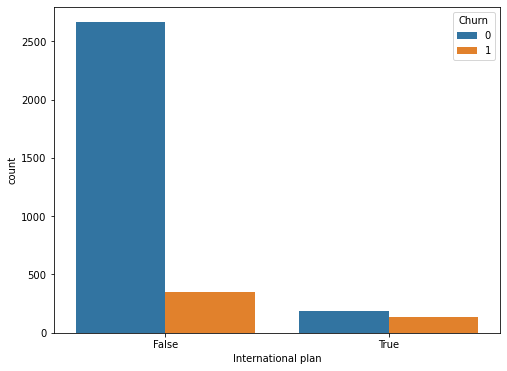

In [37]:
sns.countplot(x='International plan', hue='Churn', data=df);
plt.savefig('int_plan_and_churn.png', dpi=300);

З рисунку вище бачимо, що коли роумінг підключений, частка відтоку набагато вища — ***цікаве спостереження!*** Можливо, великі та погано контрольовані витрати в роумінгу дуже конфліктогенні й ведуть до невдоволення клієнтів телеком-оператора і, відповідно, до їхнього відтоку.

Далі переглянемо ще одну важливу ознаку — *"Число звернень до сервісного центру"* (`Customer service calls`). Також побудуємо зведену таблицю й візуалізуємо результат.

In [38]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


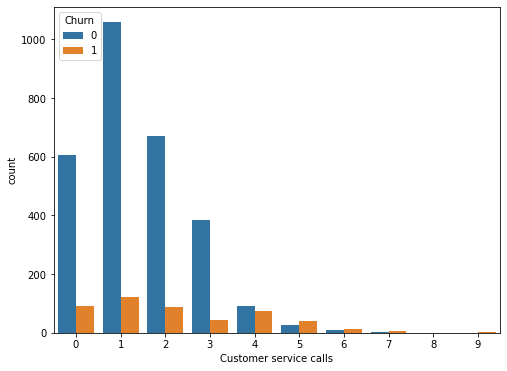

In [39]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.savefig('serv_calls__and_churn.png', dpi=300);

Можливо, що за зведеною таблицею це не так добре видно (або скучно проводити поглядом по рядках з цифрами). Проте рисунок вище відмінно ілюструє, що частка відтоку сильно зростає від 4-ох дзвінків в сервісний центр.

Тепер додамо до нашого DataFrame бінарну ознаку — результат порівняння `Customer service calls > 3`. Давайте ще раз глянемо, як він пов'язаний з відтоком.

In [40]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


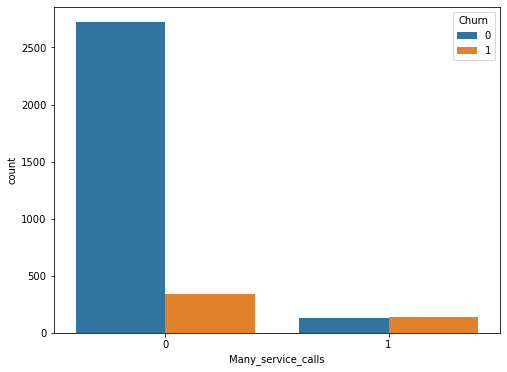

In [41]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);
plt.savefig('many_serv_calls__and_churn.png', dpi=300);

Об'єднаємо розглянуті вище умови та побудуємо зведену таблицю для цього об'єднання й відтоку.

In [42]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , 
            df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Отже, прогнозуючи відтік клієнта тоді, коли кількість дзвінків в сервісний центр більше 3-ох і підключений роумінг (і прогнозуючи лояльність — в іншому випадку), можна очікувати близько 85.8% правильних влучень (помиляємося всього 464 + 9 разів). Ці 85.8%, які ми отримали за допомогою дуже простих міркувань — це непоганий початок (так званий *baseline*) для подальших моделей ІАД, які ми надалі будемо будувати.

Загалом до появи інтелектуального складника процес традиційного аналізу даних виглядав приблизно так. Зробимо висновки:
    
1. Частка лояльних клієнтів у вибірці — 85.5%. Найбільш наївна та проста модель, відповідь якої "Клієнт завжди лояльний" на подібних даних буде вгадувати близько в 85,5% випадків. Тобто значення частки правильних відповідей (*accuracy*) подібних моделей повинні бути як мінімум не менші, а краще, значно вищі цієї цифри.
2. За допомогою простого прогнозу, який умовно можна виразити такою формулою: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", можна очікувати частку вгадувань 85.8%, що ще трохи вище 85.5%.
3. Ці два бейзлайна ми отримали без використання яких-небудь елементів ІАД, і вони слугують початком для майбутнього моделювання. Якщо виявиться, що ми збільшуємо частку правильних відповідей всього лише, скажімо, на 0.5%, але завдяки значним зусиллям, то певно, ми щось робимо не так, і тому варто обмежитися простою моделлю з цих двох умов.
4. Перед побудовую й навчанням складних моделей рекомендується трохи покрутити дані та перевірити прості гіпотези. Більш того, в бізнес-застосунках ІАД найчастіше починають саме з простих рішень, а потім експериментують з їхнім ускладненням.

<a class="anchor" id="1.3"></a>

## <span style="color:blue; font-size:1.2em;">1.3. Корисні покликання</span>

[Повернутися до змісту](#1)

* Official Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html)
* [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas cheatsheet PDF](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
* GitHub repos: [Pandas exercises](https://github.com/guipsamora/pandas_exercises/) and ["Effective Pandas"](https://github.com/TomAugspurger/effective-pandas)
* [scipy-lectures.org](http://www.scipy-lectures.org/index.html) — tutorials on pandas, numpy, matplotlib and scikit-learn